# Prétraitement & Description

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

In [119]:
#Chargement des données 
df=pd.read_csv("../data/diabete_data.csv")
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [120]:
df.shape

(768, 9)

In [121]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [123]:
# Détection les doublons
doublons = df[df.duplicated()]
print("Le nombre total de valeurs manquantes est :", len(doublons))


Le nombre total de valeurs manquantes est : 0


#Dispartition des valeurs

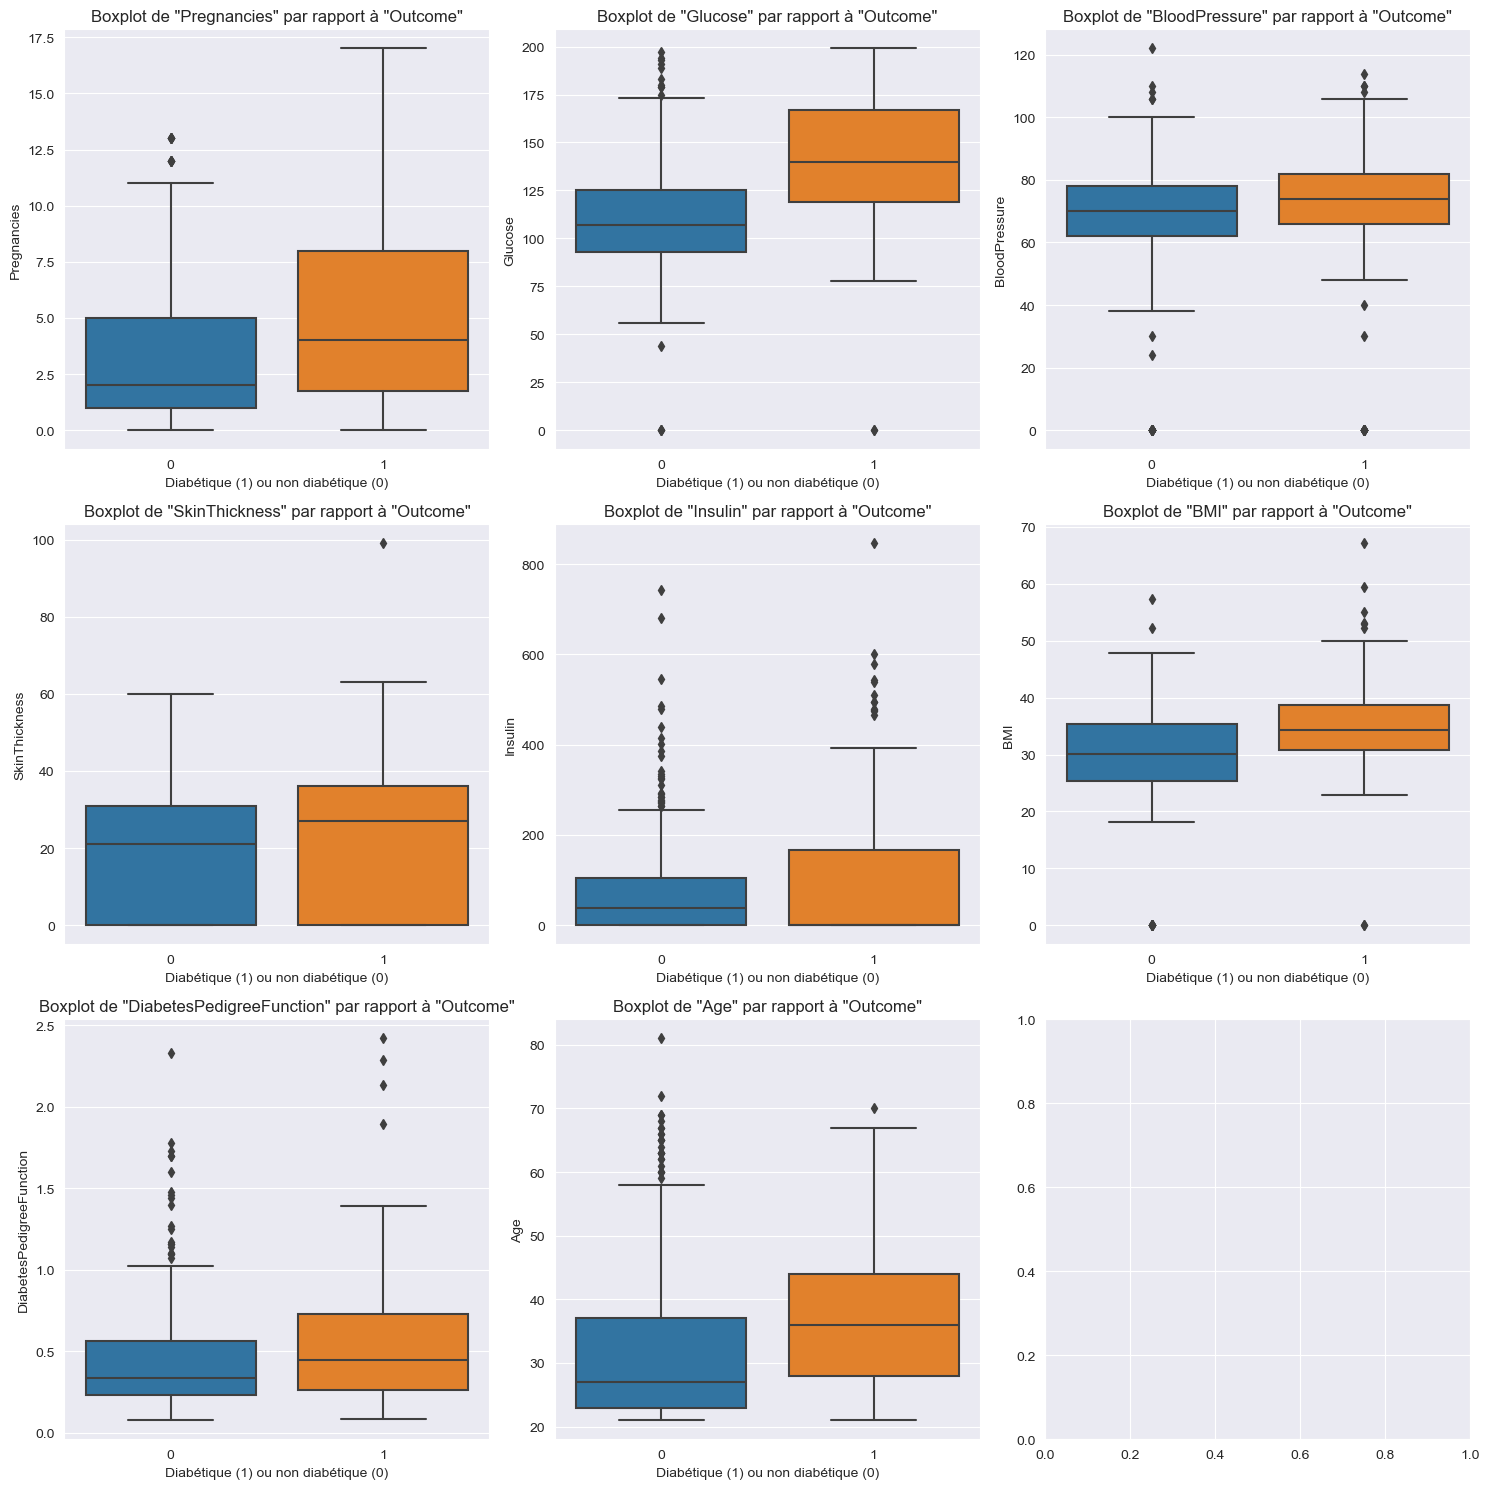

In [124]:
# Liste des variables numériques
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Création de la grille de graphiques
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Itération sur les variables et les axes
for col, ax in zip(numeric_cols, axes.flatten()):
    sns.boxplot(data=df, x='Outcome', y=col, ax=ax)
    ax.set_title(f'Boxplot de "{col}" par rapport à "Outcome"')
    ax.set_xlabel('Diabétique (1) ou non diabétique (0)')
    ax.set_ylabel(col)

# Ajustement du placement des sous-graphiques
plt.tight_layout()

# Affichage des graphiques
plt.show()

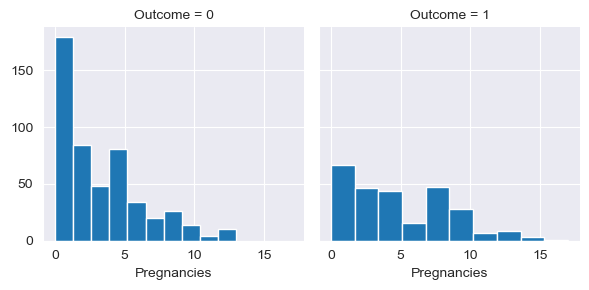

In [125]:
Pregnancies=sns.FacetGrid(df,col='Outcome')
Pregnancies.map(plt.hist,'Pregnancies')

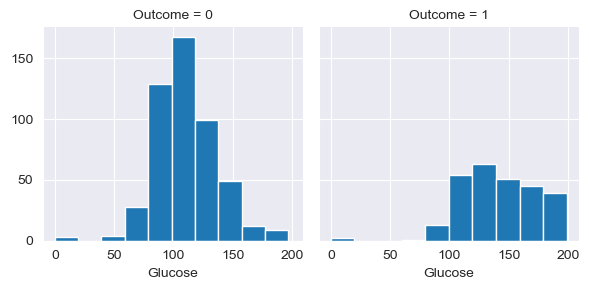

In [126]:
Pregnancies=sns.FacetGrid(df,col='Outcome')
Pregnancies.map(plt.hist,'Glucose')

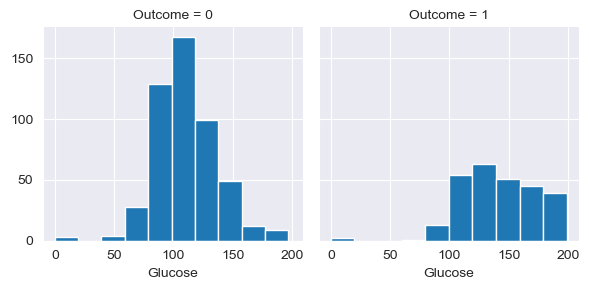

In [127]:
Pregnancies=sns.FacetGrid(df,col='Outcome')
Pregnancies.map(plt.hist,'Glucose')

In [128]:
# Détecter les doublons
doublons = df[df.duplicated()]
# Determinations de nombre de doublons dans notre DataFrame
nombre_de_doublons = len(doublons)
# Nombre total de valeurs manquantes (Null) dans l'ensemble de la DataFrame:
nbr_val_null = df.isna().sum().sum()
print("Le nombre total de valeurs manquantes est :", nbr_val_null)
print("Le nombre total de doublons :",nombre_de_doublons)

Le nombre total de valeurs manquantes est : 0
Le nombre total de doublons : 0


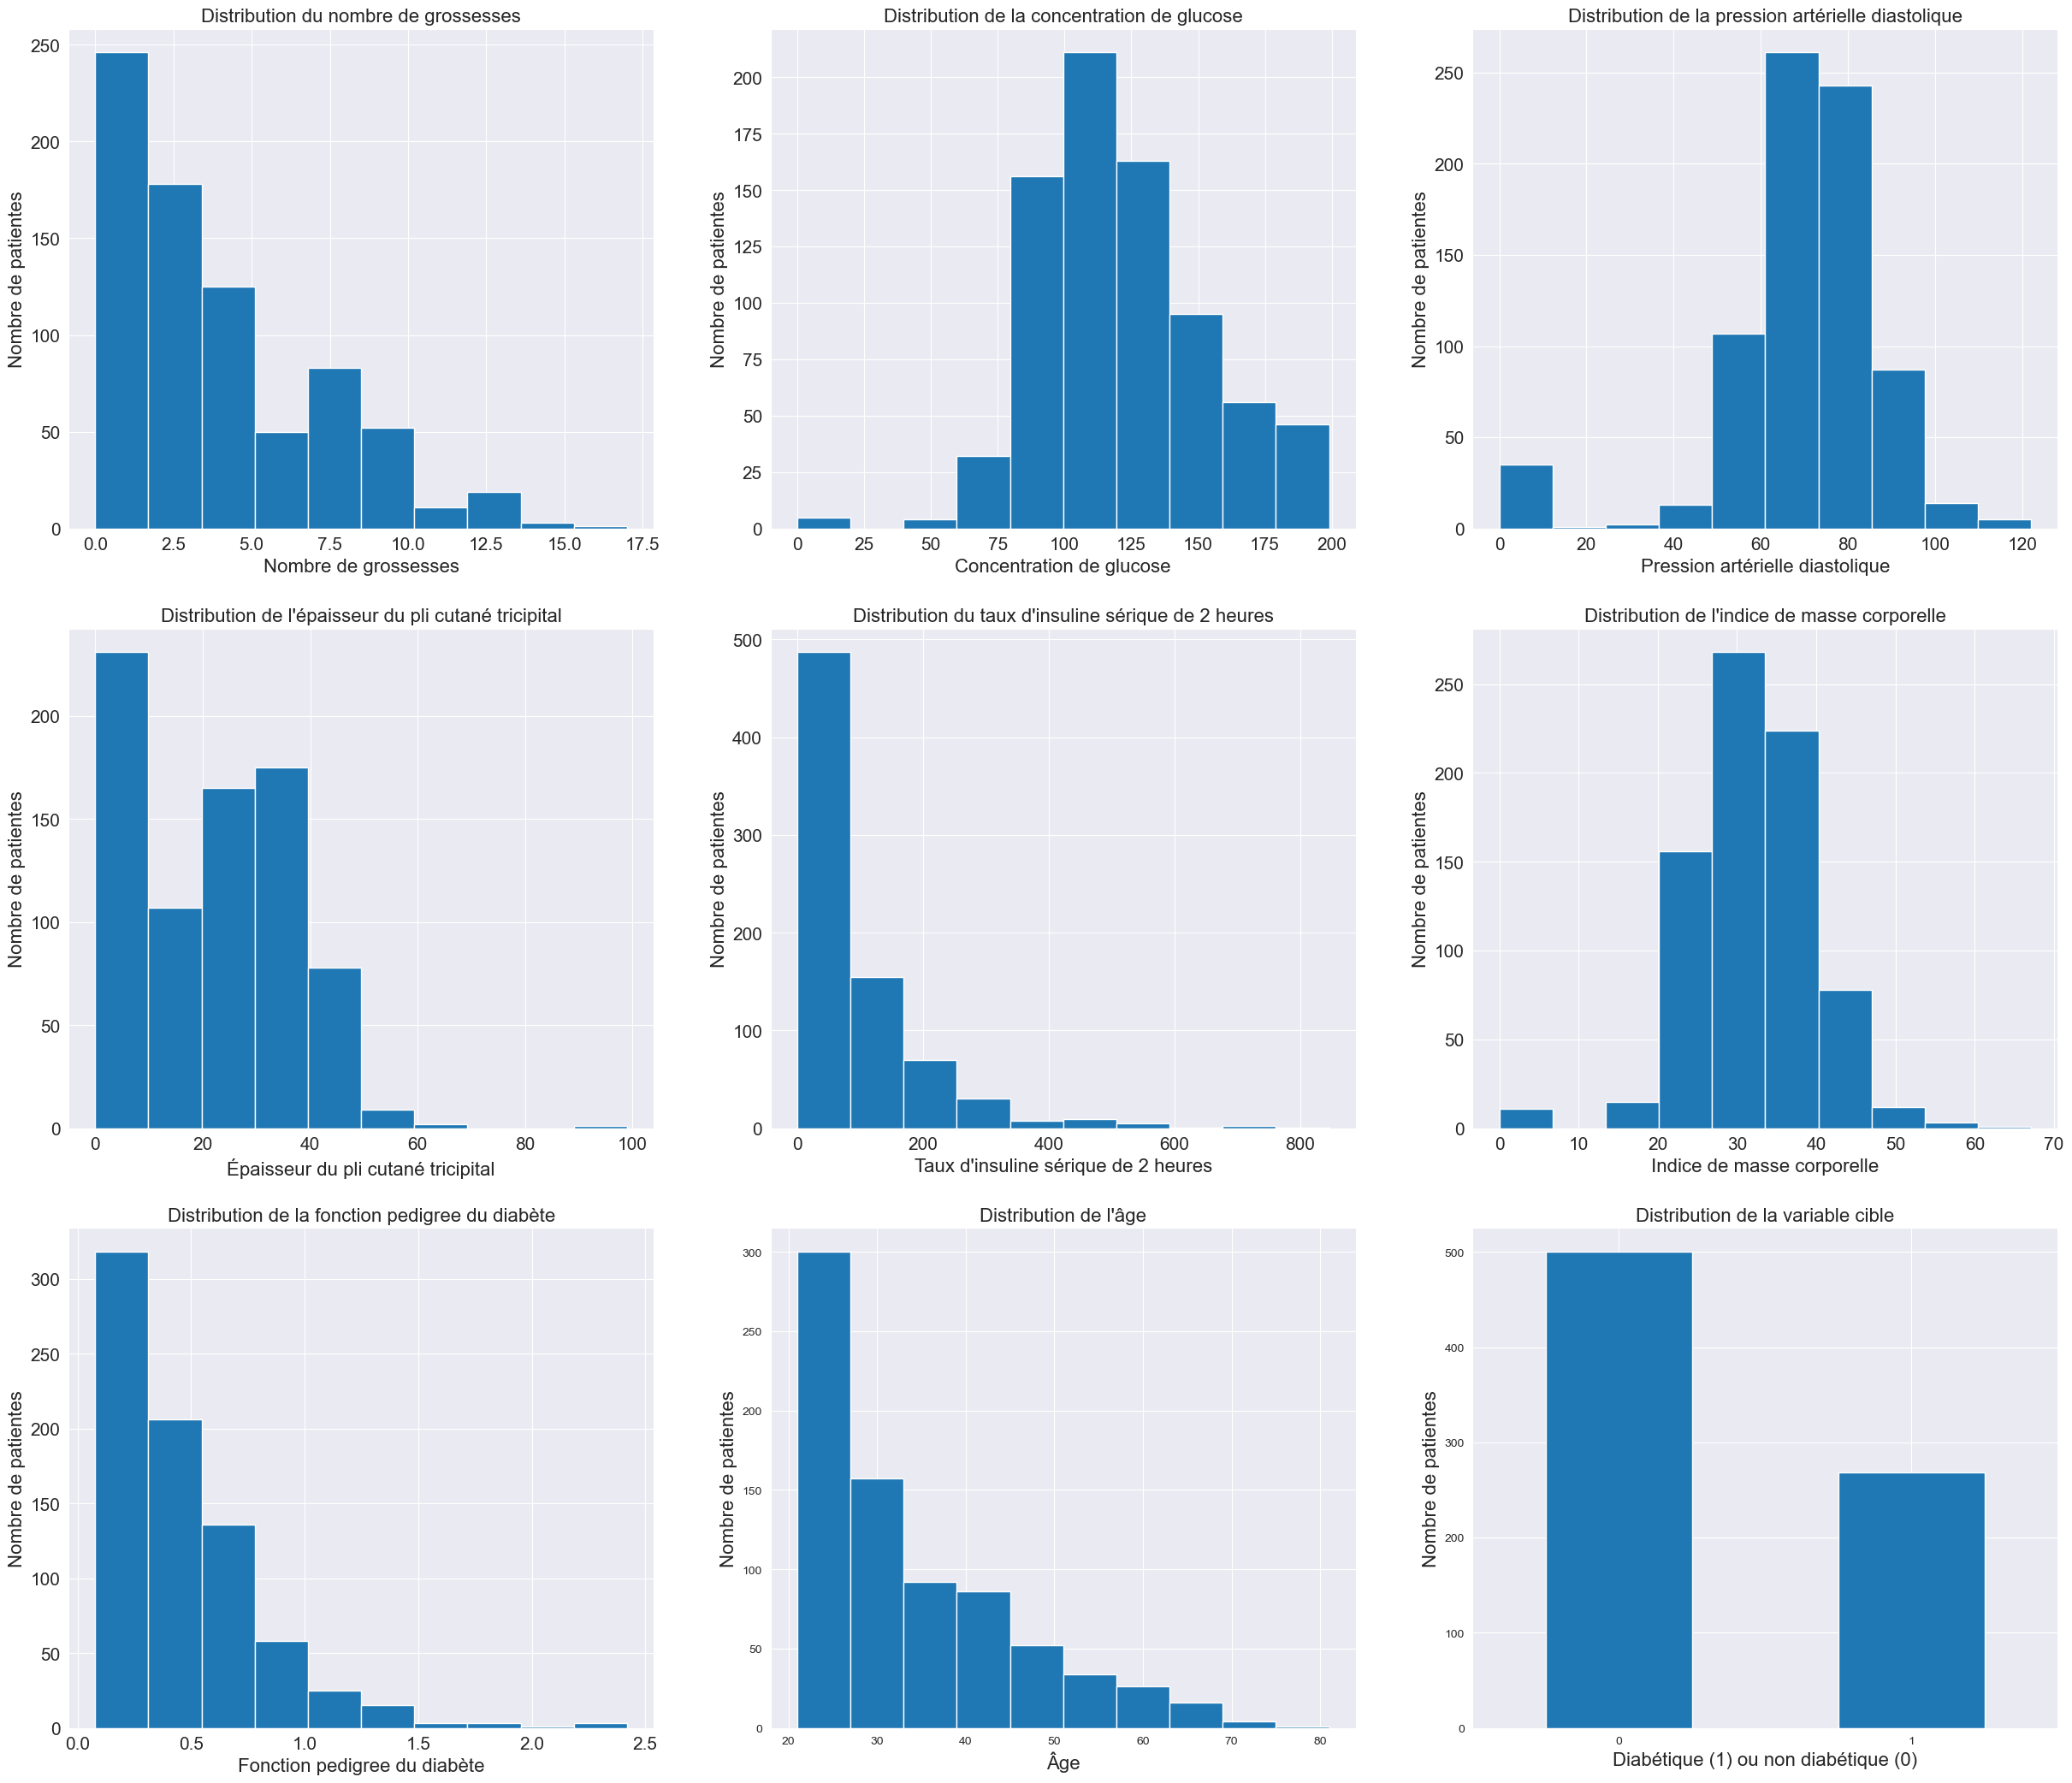

In [129]:
# Définir la taille globale de la grille de visualisation
plt.figure(figsize=(30, 44))


# Histogramme pour 'Pregnancies'
plt.subplot(5, 3, 1)
df['Pregnancies'].hist()
plt.title('Distribution du nombre de grossesses',fontsize=16)
plt.xlabel('Nombre de grossesses',fontsize=16)
plt.ylabel('Nombre de patientes',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Histogramme pour 'Glucose'
plt.subplot(5, 3, 2)
df['Glucose'].hist()
plt.title('Distribution de la concentration de glucose',fontsize=16)
plt.xlabel('Concentration de glucose',fontsize=16)
plt.ylabel('Nombre de patientes',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Histogramme pour 'BloodPressure'
plt.subplot(5, 3, 3)
df['BloodPressure'].hist()
plt.title('Distribution de la pression artérielle diastolique',fontsize=16)
plt.xlabel('Pression artérielle diastolique',fontsize=16)
plt.ylabel('Nombre de patientes',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Histogramme pour 'SkinThickness'
plt.subplot(5, 3, 4)
df['SkinThickness'].hist()
plt.title('Distribution de l\'épaisseur du pli cutané tricipital',fontsize=16)
plt.xlabel('Épaisseur du pli cutané tricipital',fontsize=16)
plt.ylabel('Nombre de patientes',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Histogramme pour 'Insulin'
plt.subplot(5, 3, 5)
df['Insulin'].hist()
plt.title('Distribution du taux d\'insuline sérique de 2 heures',fontsize=16)
plt.xlabel('Taux d\'insuline sérique de 2 heures',fontsize=16)
plt.ylabel('Nombre de patientes',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Histogramme pour 'BMI'
plt.subplot(5, 3, 6)
df['BMI'].hist()
plt.title('Distribution de l\'indice de masse corporelle',fontsize=16)
plt.xlabel('Indice de masse corporelle',fontsize=16)
plt.ylabel('Nombre de patientes',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Histogramme pour 'DiabetesPedigreeFunction'
plt.subplot(5, 3, 7)
df['DiabetesPedigreeFunction'].hist()
plt.title('Distribution de la fonction pedigree du diabète',fontsize=16)
plt.xlabel('Fonction pedigree du diabète',fontsize=16)
plt.ylabel('Nombre de patientes',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# Histogramme pour 'Age'
plt.subplot(5, 3, 8)
df['Age'].hist()
plt.title('Distribution de l\'âge',fontsize=16)
plt.xlabel('Âge',fontsize=16)
plt.ylabel('Nombre de patientes',fontsize=16)

# Diagramme en barres pour 'Outcome'
plt.subplot(5, 3, 9)
df['Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution de la variable cible',fontsize=16)
plt.xlabel('Diabétique (1) ou non diabétique (0)',fontsize=16)
plt.ylabel('Nombre de patientes',fontsize=16)
plt.xticks(rotation=0)

plt.show()  

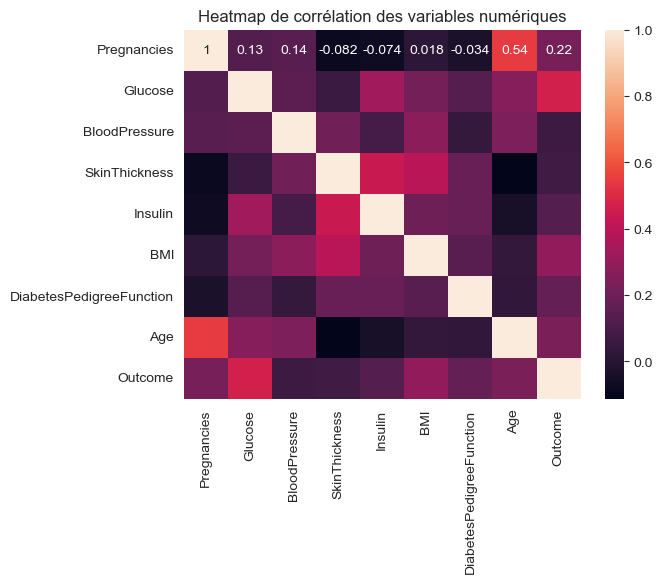

In [130]:
matrix_corr = df.corr()
#Visualisation la matrix de correlation
sns.heatmap(matrix_corr, annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

# Outils - Indicateur de performance

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [132]:
# Séparation des données en variables prédictives et variable cible
X = df.drop('Outcome', axis=1)  # Variables prédictives
Y = df['Outcome']  # Variable cible`


scaler=StandardScaler().fit(X,Y)
X_normalized = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=1)

# Définition des stratégies de validation croisée
kf = KFold(n_splits=40, shuffle=True, random_state=42)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
loo = LeaveOneOut()

# Définition du pipeline avec le classificateur k-NN
pipeline = Pipeline([
    ('clf', KNeighborsClassifier())  # Classifier k-NN
])

def test_with_strategy(cv_strategy, pipeline, X_normalized, Y):
    # Évaluation avec la stratégie de validation croisée donnée
    cv_results = cross_val_predict(pipeline,X_normalized , Y, cv=cv_strategy)
    return  cv_results

# Évaluation avec K-Fold
pred1 = test_with_strategy(kf, pipeline, X_normalized, Y)

# Évaluation avec Leave-One-Out
pred2 = test_with_strategy(loo, pipeline, X_normalized, Y)


In [133]:
def evaluate_model(cv_strategy, pipeline, X,Y):
    # Obtenir les prédictions du modèle sur les données de test
    y_pred = cross_val_predict(pipeline, X, Y, cv=cv_strategy)

    # Calcul de l'accuracy
    accuracy = sum(Y == y_pred) / len(Y)

    # Calcul de la précision
    true_positives = sum((Y == 1) & (y_pred == 1))
    false_positives = sum((Y == 0) & (y_pred == 1))
    true_negatives = sum((Y == 0) & (y_pred == 0))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

    # Calcul du rappel
    false_negatives = sum((Y == 1) & (y_pred == 0))
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # Calcul du F1-score
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Calcul de la matrice de confusion

    conf_matrix = [[true_negatives, false_positives], [false_negatives, true_positives]]

    # Affichage des résultats
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1-score:{f1:.2f}")
    print(f"Matrice de confusion:")
    for row in conf_matrix:
        print(row)


# Évaluation avec K-Fold
evaluate_model(kf, pipeline, X_normalized, Y)

# Évaluation avec Leave-One-Out
evaluate_model(loo, pipeline, X_normalized, Y)


Accuracy: 0.74
Precision: 0.65
Recall:0.55
F1-score:0.60
Matrice de confusion:
[422, 78]
[121, 147]
Accuracy: 0.74
Precision: 0.65
Recall:0.55
F1-score:0.60
Matrice de confusion:
[422, 78]
[120, 148]


In [134]:
# Fonction pour tracer les courbes ROC
def plot_roc_final(cv_strategy, pipeline, X_train, y_train, X_test, y_test):
    # Obtenir les prédictions du modèle sur l'ensemble d'entraînement
    y_train_prob = cross_val_predict(pipeline, X_train, y_train, cv=cv_strategy, method='predict_proba')[:, 1]

    # Ajuster le modèle sur l'ensemble d'entraînement
    pipeline.fit(X_train, y_train)

    # Prédictions sur l'ensemble de test
    y_test_prob = pipeline.predict_proba(X_test)[:, 1]

    # Courbe ROC pour les prédictions sur l'ensemble d'entraînement
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
    roc_auc_train = roc_auc_score(y_train, y_train_prob)

    # Courbe ROC pour les prédictions sur l'ensemble de test
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
    roc_auc_test = roc_auc_score(y_test, y_test_prob)

    # Tracer les courbes ROC
    plt.figure()
    plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
    plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


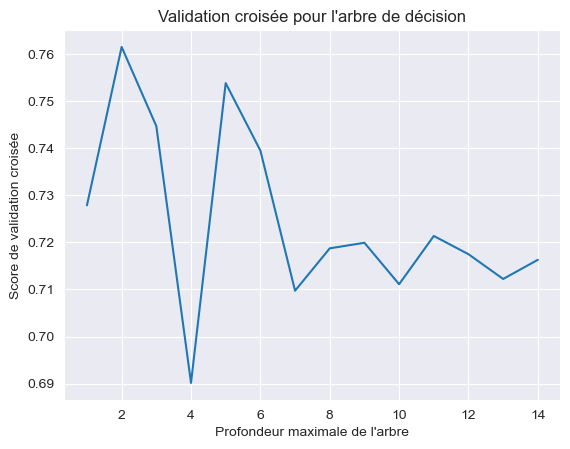

In [135]:

# Liste des profondeurs maximales à tester
max_depths = range(1, 15)

# Liste pour stocker les scores de validation croisée
cv_scores = []

# Pour chaque profondeur maximale, entraîner un arbre de décision et calculer le score de validation croisée
for depth in max_depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(tree, X_normalized, Y, cv=kf)
    cv_scores.append(np.mean(scores))

# Tracer le graphique de validation croisée pour choisir la complexité de l'arbre optimal
plt.plot(max_depths, cv_scores)
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour l\'arbre de décision')
plt.show()

In [136]:
# Trouver la profondeur maximale qui donne le meilleur score de validation croisée
best_depth = max_depths[np.argmax(cv_scores)]
print('La meilleure profondeur maximale est :', best_depth)

La meilleure profondeur maximale est : 2


In [137]:
# Construire l'arbre de décision avec la profondeur maximale choisie
tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

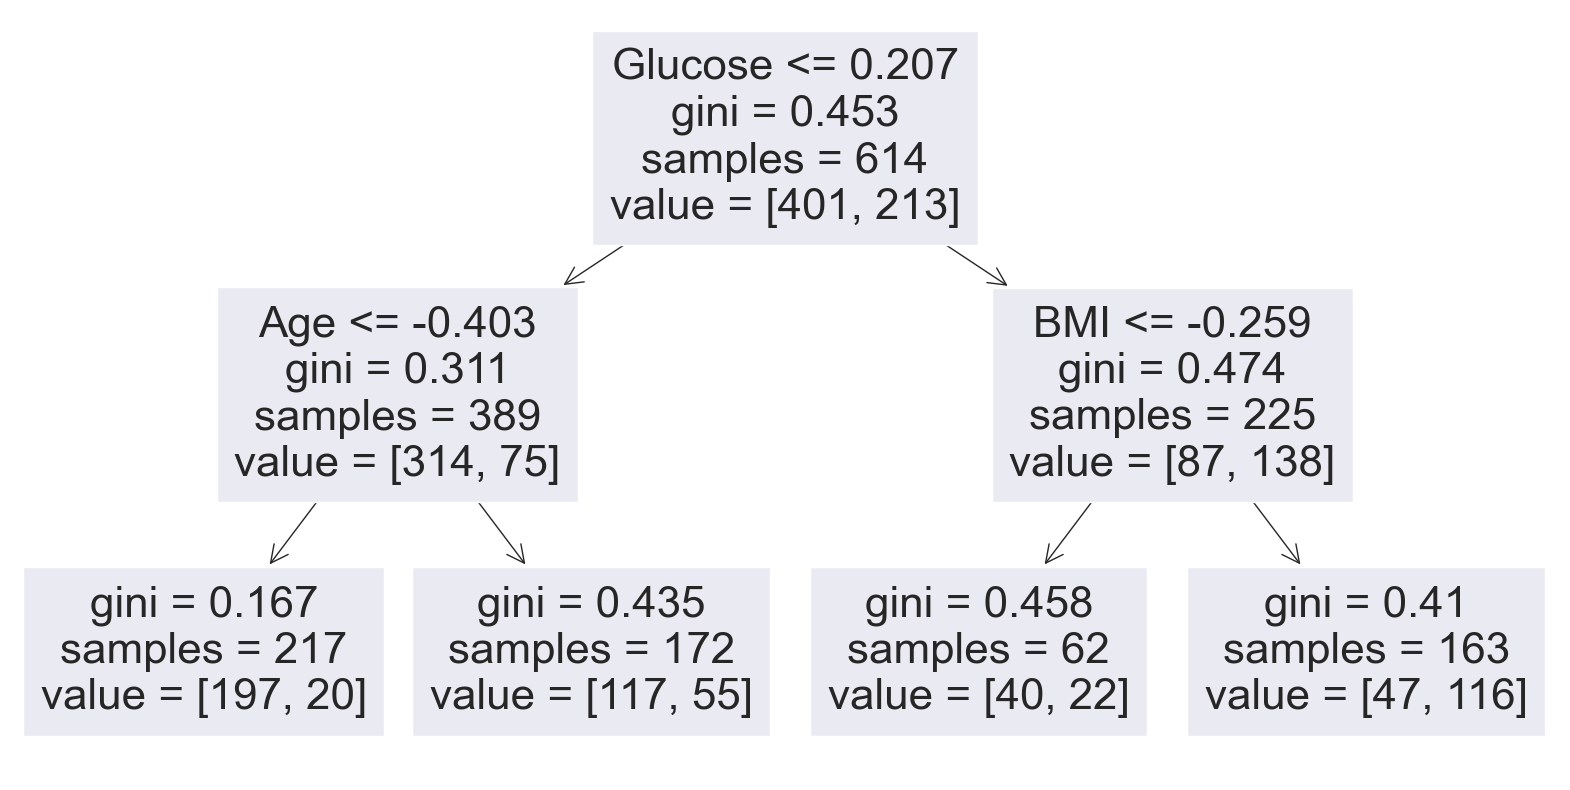

In [138]:
plt.figure(figsize=(20,10))
plot_tree(tree, feature_names=X.columns)
plt.show()

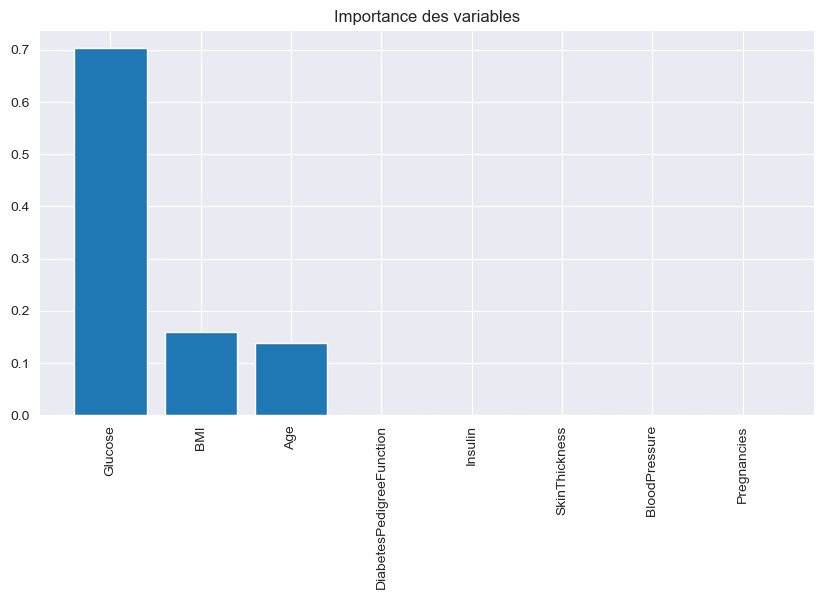

In [139]:
# Affichage de l'importance des variables
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title("Importance des variables")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

#Trouver le meuilleur K pour KNN

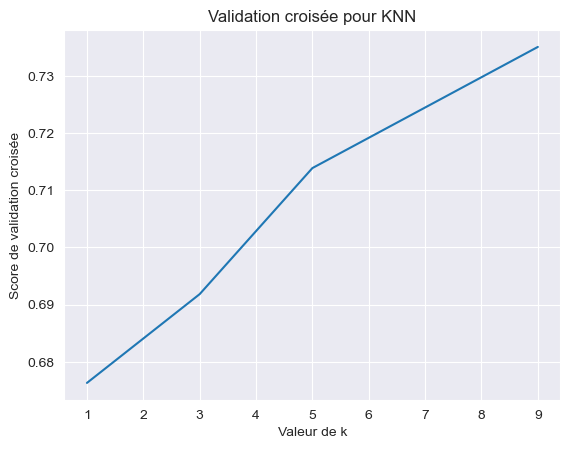

In [140]:
# Définition des valeurs de k à tester
k_values = [1, 3, 5,9]

# Liste pour stocker les scores de validation croisée
k_cv_scores = []

# Pour chaque valeur de k, entraîner un classifieur KNN et calculer le score de validation croisée
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=kf)
    k_cv_scores.append(np.mean(scores))

#graphique de validation croisée pour choisir la meilleure valeur de k
plt.plot(k_values, k_cv_scores)
plt.xlabel('Valeur de k')
plt.ylabel('Score de validation croisée')
plt.title('Validation croisée pour KNN')
plt.show()


In [141]:
# Trouver la valeur de k qui donne le meilleur score de validation croisée
best_k = k_values[np.argmax(k_cv_scores)]
print('Le meilleur k est :', best_k)

Le meilleur k est : 9


In [142]:
def rocPlot(y_train_prob, y_train, y_test_prob, y_test):
    # Courbe ROC pour la base train
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
    roc_auc_train = roc_auc_score(y_train, y_train_prob)

    # Courbe ROC pour la base test
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
    roc_auc_test = roc_auc_score(y_test, y_test_prob)

    plt.figure()
    plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % roc_auc_train, linewidth=2)
    plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % roc_auc_test, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

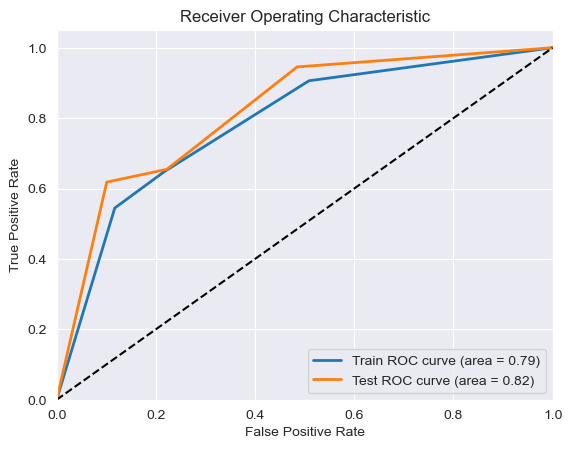

In [143]:
# Prédictions sur l'ensemble d'entraînement
y_train_pred = tree.predict(X_train)
y_train_prob = tree.predict_proba(X_train)[:, 1]

# Prédictions sur l'ensemble de test
y_test_pred = tree.predict(X_test)
y_test_prob = tree.predict_proba(X_test)[:, 1]

rocPlot(y_train_prob, y_train, y_test_prob, y_test)

------Decision Tree------
-------------Stratégie de validation croisée: KFold --------------
Accuracy: 0.71
Precision: 0.59
Recall:0.61
F1-score:0.60
Matrice de confusion:
[386, 114]
[105, 163]


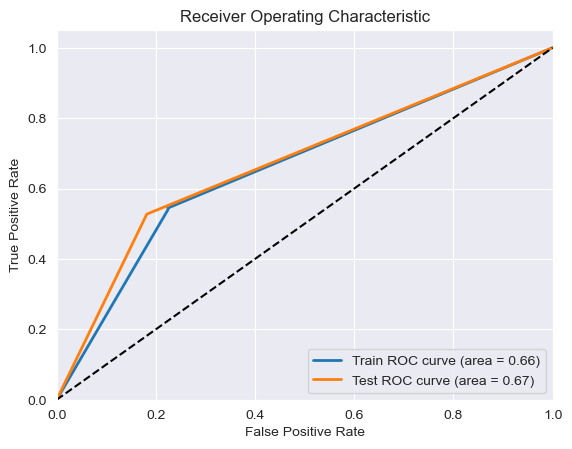

-------------Stratégie de validation croisée: StratifiedKFold --------------
Accuracy: 0.70
Precision: 0.56
Recall:0.57
F1-score:0.57
Matrice de confusion:
[381, 119]
[115, 153]


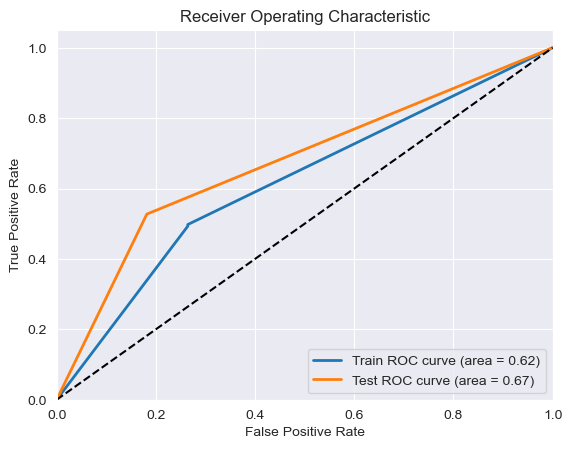

-------------Stratégie de validation croisée: LeaveOneOut --------------
Accuracy: 0.70
Precision: 0.57
Recall:0.59
F1-score:0.58
Matrice de confusion:
[383, 117]
[111, 157]


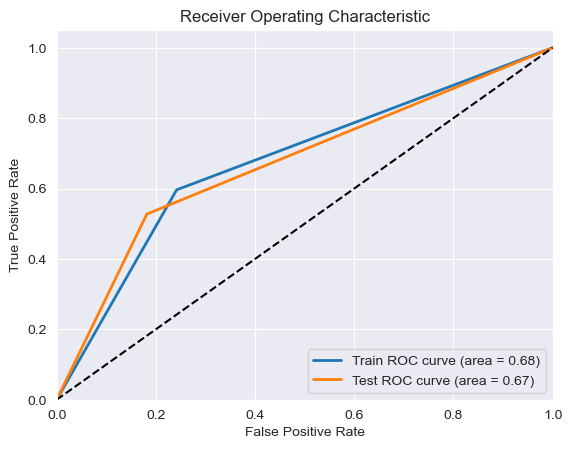

------KNN------
-------------Stratégie de validation croisée: KFold --------------
Accuracy: 0.74
Precision: 0.65
Recall:0.54
F1-score:0.59
Matrice de confusion:
[422, 78]
[122, 146]


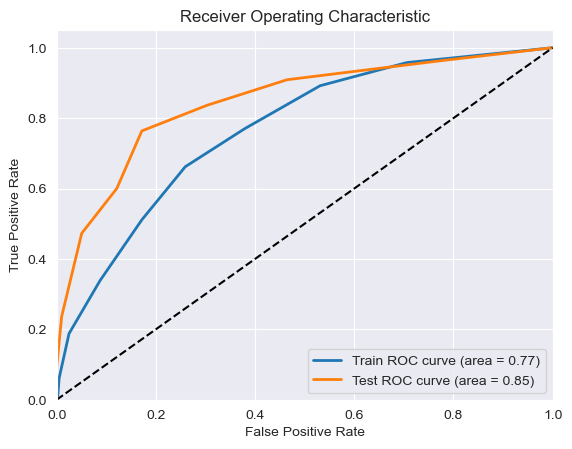

-------------Stratégie de validation croisée: StratifiedKFold --------------
Accuracy: 0.75
Precision: 0.66
Recall:0.57
F1-score:0.61
Matrice de confusion:
[422, 78]
[116, 152]


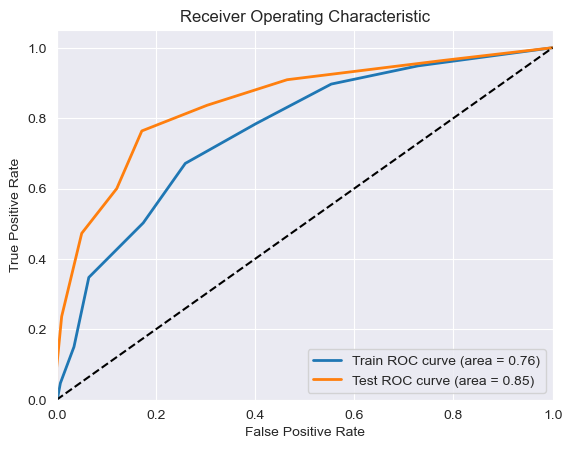

-------------Stratégie de validation croisée: LeaveOneOut --------------
Accuracy: 0.74
Precision: 0.66
Recall:0.54
F1-score:0.59
Matrice de confusion:
[424, 76]
[123, 145]


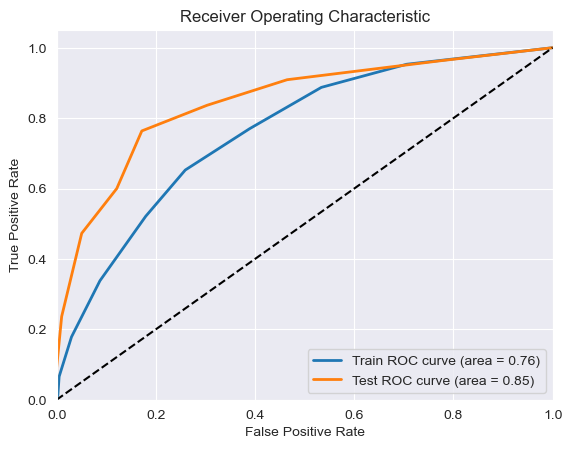

------Random Forest------
-------------Stratégie de validation croisée: KFold --------------
Accuracy: 0.76
Precision: 0.69
Recall:0.59
F1-score:0.63
Matrice de confusion:
[429, 71]
[111, 157]


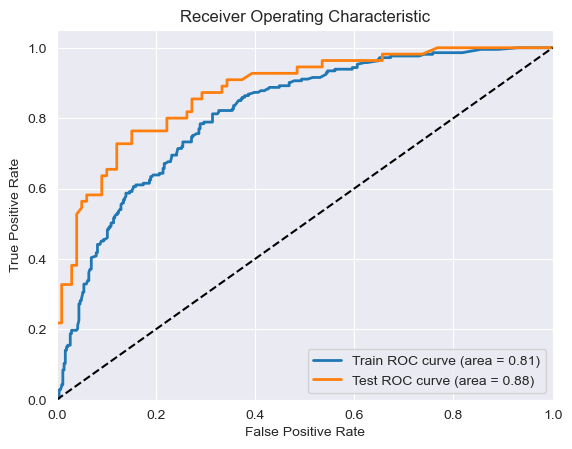

-------------Stratégie de validation croisée: StratifiedKFold --------------
Accuracy: 0.77
Precision: 0.70
Recall:0.60
F1-score:0.65
Matrice de confusion:
[431, 69]
[106, 162]


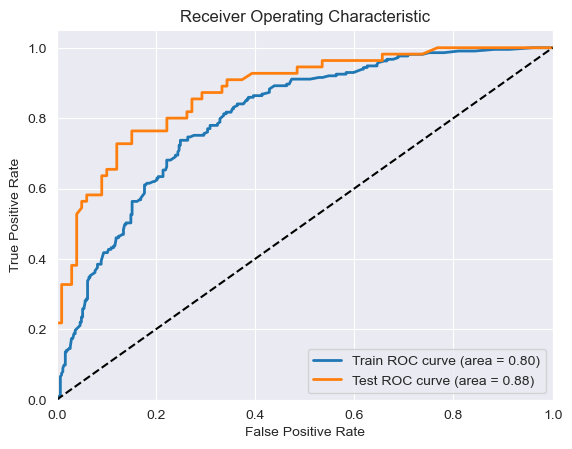

-------------Stratégie de validation croisée: LeaveOneOut --------------
Accuracy: 0.76
Precision: 0.69
Recall:0.60
F1-score:0.64
Matrice de confusion:
[427, 73]
[108, 160]


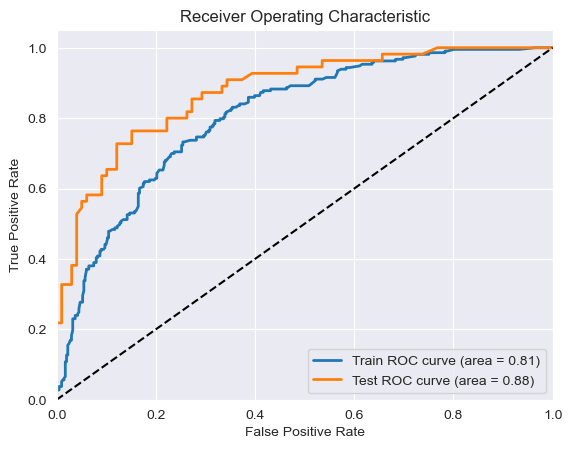

------Logistic Regression------
-------------Stratégie de validation croisée: KFold --------------
Accuracy: 0.78
Precision: 0.74
Recall:0.57
F1-score:0.65
Matrice de confusion:
[445, 55]
[114, 154]


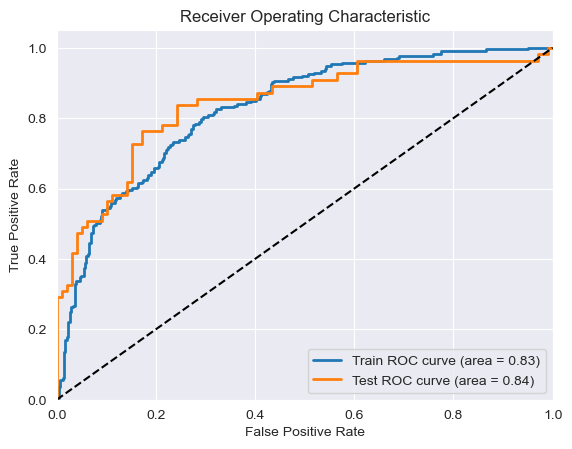

-------------Stratégie de validation croisée: StratifiedKFold --------------
Accuracy: 0.77
Precision: 0.73
Recall:0.57
F1-score:0.64
Matrice de confusion:
[442, 58]
[115, 153]


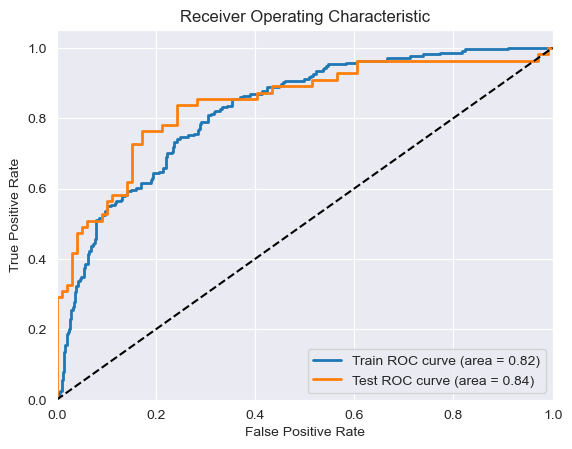

-------------Stratégie de validation croisée: LeaveOneOut --------------
Accuracy: 0.78
Precision: 0.73
Recall:0.57
F1-score:0.64
Matrice de confusion:
[444, 56]
[116, 152]


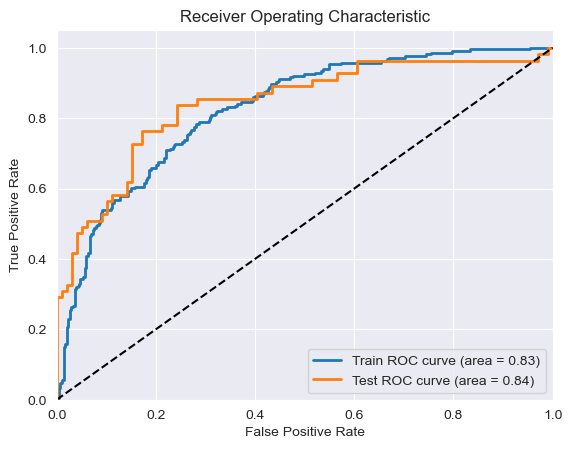

In [144]:
# Liste des noms des classificateurs
classifier_names = ['Decision Tree', 'KNN', 'Random Forest', 'Logistic Regression']
classifier_model = [DecisionTreeClassifier(max_depth=depth,criterion='gini', random_state=42), KNeighborsClassifier(n_neighbors=best_k, metric='euclidean'), RandomForestClassifier(n_estimators=100, max_depth=depth, min_samples_split=2,random_state=42), LogisticRegression()]

# Stratégies de validation croisée à utiliser
cv_strategies = [kf, skf, loo]
cv_names = ['KFold', 'StratifiedKFold', 'LeaveOneOut']  
# Créer un pipeline pour chaque classificateur et les évaluer
for clf, clf_name in zip(classifier_model, classifier_names):
    print(f"------{clf_name}------")
    for cv_strategy, cv_name in zip(cv_strategies, cv_names):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', clf)
        ])
        print(f"-------------Stratégie de validation croisée: {cv_name} --------------")
        evaluate_model(cv_strategy, pipeline, X_normalized, Y)
        plot_roc_final(cv_strategy, pipeline,X_train,y_train,X_test,y_test)